In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Classified Data',index_col=0)

In [3]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
scaler = StandardScaler()

In [6]:
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler()

In [7]:
scaled_featues = scaler.transform(df.drop("TARGET CLASS",axis=1))

In [8]:
 df_feat = pd.DataFrame(scaled_featues,columns=df.columns[:-1])

In [9]:
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train , X_test , y_train, y_test = train_test_split(df_feat,df['TARGET CLASS'],test_size = 0.3)

In [12]:
from sklearn.neighbors import KNeighborsClassifier

In [18]:
knn = KNeighborsClassifier(n_neighbors=1)

In [19]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [20]:
prediction = knn.predict(X_test)

In [21]:
from sklearn.metrics import classification_report,confusion_matrix

In [22]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.96      0.85      0.90       157
           1       0.86      0.96      0.90       143

    accuracy                           0.90       300
   macro avg       0.91      0.91      0.90       300
weighted avg       0.91      0.90      0.90       300



In [23]:
print(confusion_matrix(y_test,prediction))

[[134  23]
 [  6 137]]


In [26]:
#Choosing best K value 

error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors= i)
    knn.fit(X_train,y_train)
    pred = knn.predict(X_test)
    error_rate.append(np.mean(pred != y_test))

In [27]:
error_rate

[0.09666666666666666,
 0.08,
 0.08333333333333333,
 0.06333333333333334,
 0.06666666666666667,
 0.06666666666666667,
 0.06333333333333334,
 0.06,
 0.06333333333333334,
 0.06666666666666667,
 0.06666666666666667,
 0.06333333333333334,
 0.06,
 0.06333333333333334,
 0.06,
 0.056666666666666664,
 0.06666666666666667,
 0.06666666666666667,
 0.06333333333333334,
 0.06333333333333334,
 0.07,
 0.07,
 0.07333333333333333,
 0.06,
 0.07,
 0.06333333333333334,
 0.07333333333333333,
 0.06666666666666667,
 0.07333333333333333,
 0.06666666666666667,
 0.07,
 0.06666666666666667,
 0.06666666666666667,
 0.06666666666666667,
 0.07,
 0.07333333333333333,
 0.07333333333333333,
 0.07,
 0.07333333333333333]

Text(0, 0.5, 'Error Values')

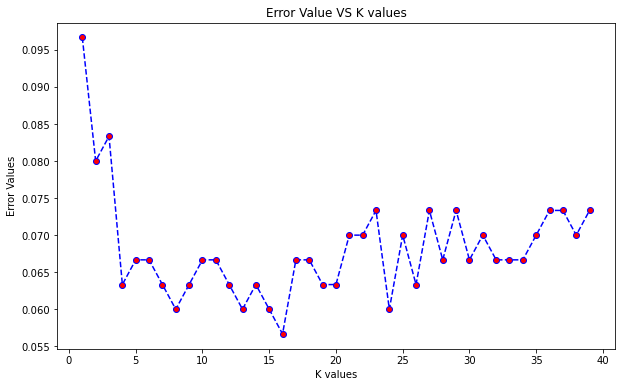

In [42]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',linestyle='--',marker='o',markerfacecolor='red')
plt.title('Error Value VS K values')
plt.xlabel('K values')
plt.ylabel('Error Values')

In [43]:
knn = KNeighborsClassifier(n_neighbors=16)

In [44]:
knn.fit(X_train,y_train,)

KNeighborsClassifier(n_neighbors=16)

In [45]:
pred = knn.predict(X_test)

In [46]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.99      0.90      0.94       157
           1       0.90      0.99      0.94       143

    accuracy                           0.94       300
   macro avg       0.94      0.95      0.94       300
weighted avg       0.95      0.94      0.94       300

